# Exploratory Data Analysis of insurance-cost.csv

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand
import math

from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Read and Observe datasets

In [2]:
insurance = pd.read_csv('insurance_charges.csv')
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


# Check correlation maps

Text(0.5, 1.0, 'Correlation Matrix')

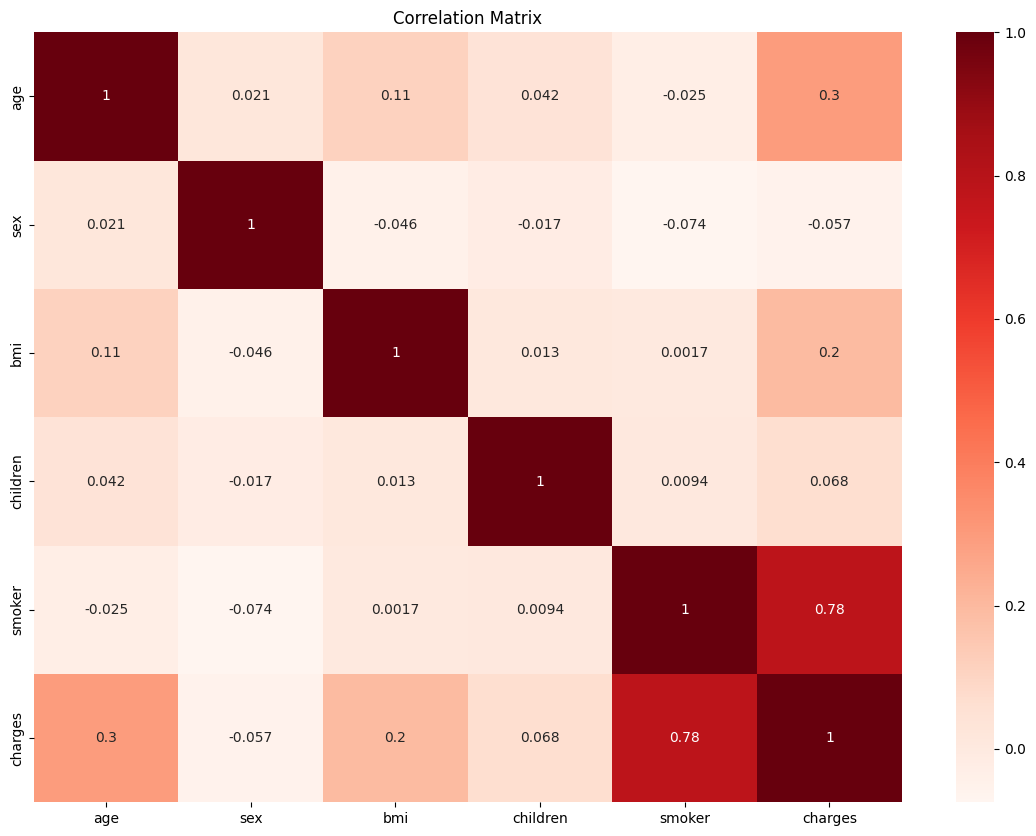

In [3]:
plt.figure(figsize=(14,10))
sns.heatmap(insurance.corr(), annot=True,cmap='Reds')
plt.title("Correlation Matrix")


In [4]:
#X = insurance[['age','sex','bmi', 'children', 'smoker']] # here we have 5 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
X = insurance[['age', 'bmi', 'smoker']]
Y = insurance['charges']
 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=11)

print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (1070, 3)
Shape of testing  set = (268, 3)


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [7]:
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]                        
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]

# Gradient Descent for Multivariate Linear Regression

In [8]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y)**2)/(2 * m)
    return J

In [9]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
 
    for iteration in range(iterations):
     #print(iteration)
     # Hypothesis Values
         h = X.dot(B)
     # Difference b/w Hypothesis and Actual Y
         loss = h - Y
     # Gradient Calculation
         gradient = X.T.dot(loss) / m
     # Changing Values of B using Gradient
         B = B - alpha * gradient
     # New Cost Value
         cost = cost_function(X, Y, B)
         cost_history[iteration] = cost
 
    return B, cost_history

In [10]:
Weights = np.zeros(X_train.shape[1])
LR = 0.2
n_iter_ = 100
newWeights, cost_history = gradient_descent(X_train, y_train, Weights, LR, n_iter_)

Text(0.5, 1.0, 'Error vs. Training Epoch')

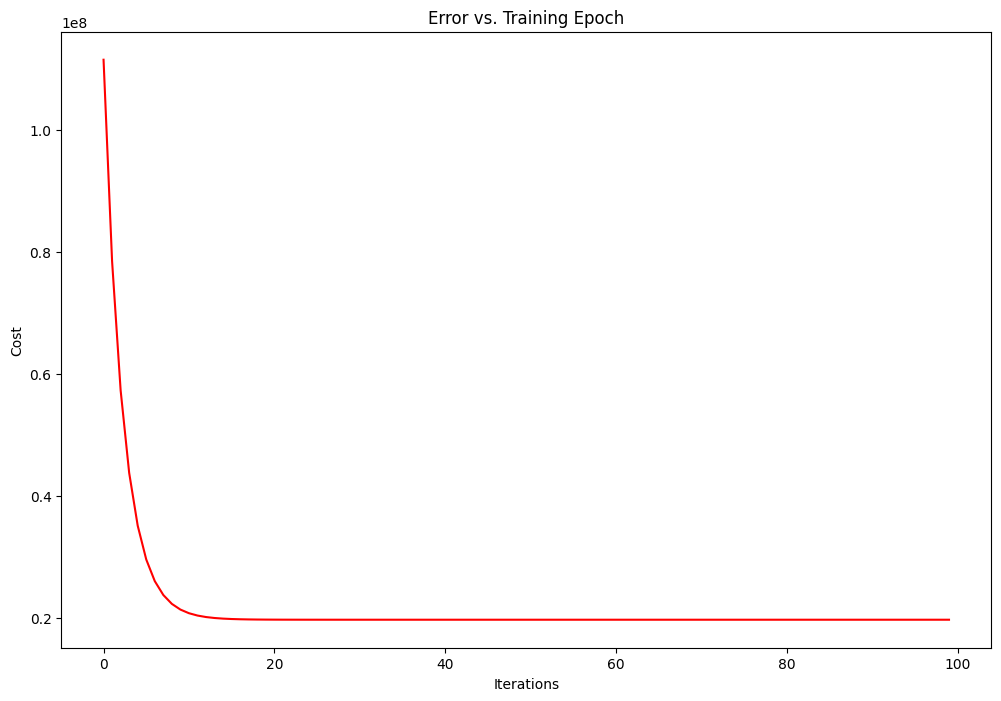

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(n_iter_), cost_history, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [12]:
y_pred = X_test.dot(newWeights)
print (newWeights)

[13339.70223238  3777.99023753  2012.73702842  9529.26447581]


In [13]:
from sklearn import metrics

r2 = metrics.r2_score(y_test, y_pred)
r  = math.sqrt(r2)
print(f'coefficient of determination = {r2:.3f}')
print(f'     correlation coefficient = {r:.3f}')

coefficient of determination = 0.778
     correlation coefficient = 0.882


In [14]:
def evaluate(y_,y):
 mse = np.mean((y_ - y) **2)  
 sst = np.sum((y-y.mean())**2)
 ssr = np.sum((y_-y)**2)
 R2_Score = 1-(ssr/sst)
 return(mse, R2_Score)


In [15]:
evaluate(y_pred, y_test)

(30818391.713354345, 0.7777619074637234)

# PSO FOR MULTIVARIATE LINEAR REGRESSION

In [1]:
from swarm_intelligence.particle import Particle
from swarm_intelligence.pso import ParticleSwarmOptimizer

ModuleNotFoundError: No module named 'swarm_intelligence'

In [ ]:
print(X_train.shape, y_train.shape)

(1070, 4) (1070,)


In [ ]:
def fitness(w, X=X_train, y=y_train):
    preds  = X.dot(w)
    return np.mean((y - preds) ** 2)


In [ ]:
pso = ParticleSwarmOptimizer(Particle, .5, .3, 30, fitness, 
                             lambda x, y: x<y, n_iter=100,
                             dims=4, random=True,
                             position_range=(0, 15000), velocity_range=(0, 15000))
pso.optimize()

print(pso.gbest, fitness(pso.gbest, X_test, y_test))

268652827.4201827
221126881.5505003
133866738.08909994
221252682.46595803
287036932.50974244
255459935.61042717
112269863.6554928
196689436.35127887
225960187.985925
292638799.96456766
148372741.25068116
97483623.13948181
222086332.63443008
254244022.67315978
67080171.88621552
306058327.7962189
387667200.2697681
153167928.49632645
353928550.7619475
236025892.53990304
265634592.43541595
167627937.1095303
187036984.09106466
234756591.97784513
143258959.27161294
288217852.79569936
206078126.93814337
275593487.3306032
278858190.69587886
379174407.58492106


  3%|██▍                                                                               | 3/100 [00:00<00:03, 24.61it/s]

260407736.45723078
155212039.5456062
133866738.08909994
192890808.37945545
287036932.50974244
244885620.99446952
111098010.64105669
133846964.17913131
177881999.05806425
222955533.46738702
121110062.04820836
71443856.03678814
217692129.4118927
175653052.84995642
67080171.88621552
306058327.7962189
309095080.88720983
129248234.00601839
338959959.4420569
219416531.27329683
222582867.37794736
145541340.70615923
166007299.4443677
231773982.18971437
115752429.80213538
227311488.50774878
163140209.37844208
239488562.50344312
253822209.52019602
309794624.78009814
204691744.18718007
109725134.61693689
133866738.08909994
177122865.1545601
249196347.5898692
217238409.2370833
103879790.83907165
112028113.27590106
133910441.81156565
222320257.2455176
92207745.66165857
67941847.25030811
171716795.50716907
163953144.84030545
67080171.88621552
223022008.01072744
221772118.5389452
116815470.60517374
317531758.064393
165629501.6690718
161014353.23030195
132210556.63236247
141337845.21780556
142529438.8

  9%|███████▍                                                                          | 9/100 [00:00<00:03, 24.55it/s]


107759046.14765933
81928094.31766021
119004470.4062578
92610119.77392425
107867679.07143612
131894779.54145168
146115799.37310693
115351601.83718933
79004710.60988072
66889934.37814696
87997614.50304055
149589963.91966897
109692387.04936998
66697866.5358186
82795204.89066231
91945106.80435647
97972878.58341715
71042548.43543085
62218782.357978225
92547986.98476894
119596009.42448264
62495075.8883091
99976471.64868677
133720067.68310784
87351521.89764234
139079424.80069318
105859009.37205918
98315969.02722137
81725701.01660135
89249471.14854155
97374901.51100287
76722590.3010965
96686519.3410594
88822265.59100083
104152465.29274379
101073626.6272916
125201135.55915742
102631794.45413077
73123519.95751941
65089633.821973026
86943546.4101721
118140229.39059481
109062176.14466524
64258336.82267875
75564036.89931335
83395053.10357688
95059406.9159469
69925278.77771524
61606862.737634405
86819417.50156304
106786426.57530193
61086758.83925874
93260056.72584456
131069401.09996247
82739050.450


 12%|█████████▋                                                                       | 12/100 [00:00<00:03, 23.36it/s]

68097858.40833472
69738790.01946625
71609718.31481963
74697581.90822218
81852949.4574873
85313392.85534994
94295400.1033845
78185043.82577266
61163524.31419278
59425240.03171255
75489840.66974397
93010665.17255731
85919475.9182923
58676768.68308534
68157598.27101807
71339399.08573686
79813600.79125123
62063533.01556601
58404141.487760544
71330295.41767046
88511884.6318662
58806406.33932513
73630339.81818634
103593372.645723
68207186.65773624
76905850.13655707
75009645.97738935
76297902.76783869
65979416.75230336
72828583.29230282
64983189.78813181
66761696.95105133
67607222.03384651
73840841.18069284
72855312.22932069
81620551.88974763
90949352.13882095
74350399.30930552
60369858.57724818
58747087.03133558
74523728.83329184
86102509.5619117
78226013.53726202
58314409.528699234
66119019.72304465
68223354.89550127
73598422.90704861
60286287.15416277
58015884.87916068
67530866.24144216
79622357.81678271
58732734.86504465
72790955.77382776
102954706.69998656
67549834.78549342
75719995.3801

 18%|██████████████▌                                                                  | 18/100 [00:00<00:03, 23.04it/s]


57170730.39127436
61748043.16700756
62919641.51859972
67974650.67967895
58464634.74399849
57109667.98831268
62361036.78943792
71133353.64094783
57955166.024900064
66718374.17239387
96808743.39706616
61677157.08611191
70908475.4638299
67916963.41565378
67691327.1628409
61788062.112708405
66304870.82140909
59141132.820719495
59736524.03388262
61254165.93419023
67819599.73385434
65164840.698129304
66651474.761465095
68838040.89679274
66371483.9956268
58215105.98502134
57625244.52582968
63588666.82889896
67116736.52900636
68536798.08129473
56972397.89393709
61109316.590852074
61910880.19866054
64757316.93835677
57609564.71546483
56898380.68657014
60838050.74050364
68137334.62717111
57862437.90224779
64475000.902257316
84650843.32512811
61210630.23264445
69015500.44196437
66299825.73742418
66552182.50426747
61375511.54891327
65421818.65085683
58343397.65091051
59405999.18903878
60637267.36837653
67159429.21154122
62679199.487778254
66397544.96911746
66060932.85588684
64724326.868664734
580

 24%|███████████████████▍                                                             | 24/100 [00:01<00:03, 24.09it/s]


64308180.199466296
63470342.59369415
59411684.82758707
58624950.26241643
60807561.67205175
57132588.72708309
57993121.07129792
58260723.15384831
62109475.80435805
60026775.968429655
60800248.95040224
61449192.22713361
60464346.02641355
57240753.7912295
56821345.209377915
59986489.48250946
61631329.89962235
60773290.99832441
56552745.807076685
58217460.588001885
59112202.283028066
60027478.95687562
56564410.71921154
56545963.74246033
57752903.54747108
60874535.20034982
57531755.82746589
60094023.437558815
68116627.33161767
59077468.67537233
63947877.96084603
62191265.257872805
58987740.00052371
58414649.133593574
60459124.11801675
57004322.59145714
57993121.07129792
57970911.63140082
62109475.80435805
59264030.40247236
59995264.59063167
60049460.359965414
59585158.104295924
57240753.7912295
56821345.209377915
59289365.96409603
60915160.58254251
60043033.43095589
56552745.807076685
58039181.46575203
59112202.283028066
59368052.420442834
56564410.71921154
56545963.74246033
57646562.41683


 27%|█████████████████████▊                                                           | 27/100 [00:01<00:03, 23.68it/s]


58030026.72466824
61859400.10546568
59833247.99339661
58167704.96116699
57554147.43545238
58922592.18406493
57004322.59145714
57747486.41972002
57629624.14605521
60218791.17975685
58799371.92045246
58260662.41720368
58631433.752939224
59253325.40860662
57219967.26528755
56821345.209377915
58233550.60813562
59143477.68413726
59214879.23524736
56552745.807076685
57657762.290609695
58401785.94999923
58737052.990064904
56564410.71921154
56545963.74246033
57646562.41683051
58576097.09746495
57531755.82746589
58207234.6047227
61135849.12510794
57943402.993093506
61842253.173628554
59620055.638658725
58053513.12302829
57554147.43545238
58566259.70883593
57004322.59145714
57747486.41972002
57592804.6432063
59966838.90965532
58799371.92045246
58260662.41720368
58631433.752939224
59253325.40860662
57219967.26528755
56821345.209377915
58233550.60813562
58986259.865704924
58934195.649798304
56552745.807076685
57657762.290609695
58231313.2138249
58656373.29733517
56564410.71921154
56545963.7424603

 33%|██████████████████████████▋                                                      | 33/100 [00:01<00:02, 22.87it/s]

59253325.40860662
57219967.26528755
56821345.209377915
57587554.274052925
58365964.77499986
58081600.515926875
56552745.807076685
57636565.419045866
58231313.2138249
58120295.60952089
56564410.71921154
56545963.74246033
57456480.0502738
58034186.82993847
57426453.197547026
57868511.03454782
59362444.988615364
57943402.993093506
60261149.04964681
58461230.60585926
57929296.05199887
57498189.06070903
58015210.61210646
56989174.48534868
57413181.179836065
57391882.871901326
59966838.90965532
58465839.49883096
57886448.94384795
58122011.64831266
59253325.40860662
57219967.26528755
56821345.209377915
57587554.274052925
58365964.77499986
57886886.540332906
56552745.807076685
57636565.419045866
58231313.2138249
58120295.60952089
56564410.71921154
56545963.74246033
57456480.0502738
57967325.775373
57377590.46666053
57679838.48672271
59305532.600977354
57943402.993093506
60261149.04964681
58461230.60585926
57929296.05199887
57498189.06070903
57954781.59972486
56989174.48534868
57413181.17983606


 36%|█████████████████████████████▏                                                   | 36/100 [00:01<00:02, 22.85it/s]

57776138.70858535
57277250.787306145
57679838.48672271
58927777.79506816
57943402.993093506
59686317.83444916
58146294.29141527
57929296.05199887
57303907.848858625
57954781.59972486
56989174.48534868
57255901.3226924
57325767.4452238
59248124.88136759
58155276.452858835
57724203.216195785
58029313.026873514
58604144.314880185
57219967.26528755
56821345.209377915
57472063.85384915
57928696.10413871
57747371.798530765
56552745.807076685
57630720.4568759
57824337.47652046
58120295.60952089
56564410.71921154
56545963.74246033
57456480.0502738
57544427.11165893
57263197.2634596
57679838.48672271
58538978.41698089
57943402.993093506
59686317.83444916
58146294.29141527
57696891.00187019
57247662.92940186
57732378.75868396
56989174.48534868
57255901.3226924
57325767.4452238
59248124.88136759
58155276.452858835
57724203.216195785
58029313.026873514
58604144.314880185
57219967.26528755
56821345.209377915
57382081.00512575
57928696.10413871
57747371.798530765
56552745.807076685
57527844.02325456

 42%|██████████████████████████████████                                               | 42/100 [00:01<00:02, 22.49it/s]

57679838.48672271
57796906.766575746
57943402.993093506
58787039.011456355
57846701.6850146
57508986.90361607
57247580.4025706
57732378.75868396
56989174.48534868
57255901.3226924
57325767.4452238
58782084.61447265
58078003.0797806
57458516.60425986
57843784.29684904
58077741.48783
57219967.26528755
56821345.209377915
57370633.02899386
57844541.20216218
57619644.6849704
56552745.807076685
57527844.02325456
57610234.05470837
58120295.60952089
56564410.71921154
56545963.74246033
57456480.0502738
57341911.3572532
57263197.2634596
57679838.48672271
57764965.85375336
57943402.993093506
58269638.93361859
57625013.951480284
57441582.85745724
57247580.4025706
57732378.75868396
56989174.48534868
57255901.3226924
57325767.4452238
58782084.61447265
58078003.0797806
57443548.65125116
57843784.29684904
58001059.92001821
57219967.26528755
56821345.209377915
57281185.866345905
57844541.20216218
57619644.6849704
56552745.807076685
57527844.02325456
57610234.05470837
58120295.60952089
56564410.71921154


 45%|████████████████████████████████████▍                                            | 45/100 [00:01<00:02, 22.59it/s]


57341911.3572532
57229109.38334678
57497391.28422627
57613094.43621341
57548234.45121956
57928032.92142186
57625013.951480284
57395447.34332555
57247580.4025706
57732378.75868396
56989174.48534868
57236864.502841726
57325767.4452238
58050583.489356965
57685427.05885006
57297871.13742895
57666632.765845336
57955336.80466326
57155988.158344686
56821345.209377915
57221621.97245878
57841896.96334056
57619644.6849704
56552745.807076685
57527844.02325456
57346549.914045855
58120295.60952089
56564410.71921154
56545963.74246033
57221006.587934196
57341911.3572532
57229109.38334678
57401052.68759387
57613094.43621341
57548234.45121956
57635913.07824162
57625013.951480284
57333833.43965717
57247580.4025706
57732378.75868396
56989174.48534868
57236864.502841726
57325767.4452238
57730173.06649903
57623719.50434342
57297871.13742895
57547206.90505344
57955336.80466326
57101288.252058014
56821345.209377915
57221621.97245878
57841896.96334056
57619644.6849704
56552745.807076685
57527844.02325456
573

 51%|█████████████████████████████████████████▎                                       | 51/100 [00:02<00:02, 23.54it/s]

57598080.49206065
57619644.6849704
56552745.807076685
57527844.02325456
57268743.36189025
57707213.25851131
56564410.71921154
56545963.74246033
57221006.587934196
57341911.3572532
57229109.38334678
57394174.14994317
57613094.43621341
57344916.02652339
57612525.07902379
57546867.90382481
57333833.43965717
57243252.73376986
57405804.433572136
56989174.48534868
57204880.68351211
57317997.598786734
57652124.71392677
57623719.50434342
57286287.404699944
57547206.90505344
57766030.14849022
57070442.29884566
56821345.209377915
57169469.66112634
57598080.49206065
57619644.6849704
56552745.807076685
57527844.02325456
57268743.36189025
57594602.50427122
56564410.71921154
56545963.74246033
57221006.587934196
57341911.3572532
57229109.38334678
57394174.14994317
57613094.43621341
57344916.02652339
57612525.07902379
57503396.59442151
57333833.43965717
57243252.73376986
57405804.433572136
56989174.48534868
57204880.68351211
57317997.598786734
57459261.01476061
57623719.50434342
57286287.404699944
575

 57%|██████████████████████████████████████████████▏                                  | 57/100 [00:02<00:01, 23.51it/s]

57317997.598786734
57459261.01476061
57440187.07827318
57286287.404699944
57472395.47603232
57766030.14849022
57070442.29884566
56821345.209377915
57169469.66112634
57497649.484670684
57376854.01831626
56552745.807076685
57527844.02325456
57268743.36189025
57479927.855208874
56564410.71921154
56545963.74246033
57221006.587934196
57341911.3572532
57229109.38334678
57264361.086668536
57613094.43621341
57326805.7986529
57492715.057470314
57451090.31258189
57333833.43965717
57243252.73376986
57382686.11600536
56989174.48534868
57204880.68351211
57317997.598786734
57395192.734293
57378709.838637106
57286287.404699944
57472395.47603232
57766030.14849022
57070442.29884566
56821345.209377915
57138324.066895336
57490219.924841285
57376854.01831626
56552745.807076685
57507786.50729214
57268743.36189025
57411205.817606956
56564410.71921154
56545963.74246033
57221006.587934196
57341911.3572532
57229109.38334678
57264361.086668536
57613094.43621341
57326805.7986529
57492715.057470314
57451090.31258


 60%|████████████████████████████████████████████████▌                                | 60/100 [00:02<00:01, 24.18it/s]


56545963.74246033
57206731.06263985
57341911.3572532
57164623.44595609
57264361.086668536
57571433.29989807
57326805.7986529
57393321.38599255
57441423.08551771
57333833.43965717
57243252.73376986
57382686.11600536
56989174.48534868
57142894.936165765
57317997.598786734
57202860.15338184
57378709.838637106
57236631.83721657
57469622.02948982
57700027.2588814
57070442.29884566
56821345.209377915
57138324.066895336
57371715.09790939
57376854.01831626
56552745.807076685
57410542.75245017
57173685.437826835
57351496.74755252
56564410.71921154
56545963.74246033
57206731.06263985
57341911.3572532
57164623.44595609
57264361.086668536
57571433.29989807
57326805.7986529
57393321.38599255
57441423.08551771
57333833.43965717
57243252.73376986
57330119.24373138
56989174.48534868
57142894.936165765
57317997.598786734
57202860.15338184
57271323.77536101
57236631.83721657
57469622.02948982
57700027.2588814
57070442.29884566
56821345.209377915
57138324.066895336
57371715.09790939
57376854.01831626
56

 66%|█████████████████████████████████████████████████████▍                           | 66/100 [00:02<00:01, 23.11it/s]


57070442.29884566
56821345.209377915
57138324.066895336
57329032.547479786
57335866.555243455
56552745.807076685
57405622.52812504
57173685.437826835
57351496.74755252
56564410.71921154
56545963.74246033
57206731.06263985
57337348.21016832
57164623.44595609
57264361.086668536
57341850.78544011
57326805.7986529
57211737.54161163
57441423.08551771
57333833.43965717
57243252.73376986
57238856.079199664
56989174.48534868
57142894.936165765
57317997.598786734
57202860.15338184
57271323.77536101
57198474.15908018
57469622.02948982
57625748.776097134
57070442.29884566
56821345.209377915
57138324.066895336
57329032.547479786
57335866.555243455
56552745.807076685
57405622.52812504
57173685.437826835
57351496.74755252
56564410.71921154
56545963.74246033
57206731.06263985
57337348.21016832
57164319.313052475
57264361.086668536
57328187.9691156
57326805.7986529
57211737.54161163
57441423.08551771
57333833.43965717
57243252.73376986
57238856.079199664
56989174.48534868
57142894.936165765
57317997.


 69%|███████████████████████████████████████████████████████▉                         | 69/100 [00:02<00:01, 23.02it/s]


57326805.7986529
57211737.54161163
57441423.08551771
57333833.43965717
57240911.06534112
57238856.079199664
56989174.48534868
57142894.936165765
57317997.598786734
57202860.15338184
57271323.77536101
57198474.15908018
57469622.02948982
57625748.776097134
57070442.29884566
56821345.209377915
57126836.65177264
57329032.547479786
57335866.555243455
56552745.807076685
57239023.631958425
57173685.437826835
57351496.74755252
56564410.71921154
56545963.74246033
57206731.06263985
57291270.51514891
57113479.9594263
57264361.086668536
57274386.08928712
57326805.7986529
57211737.54161163
57441423.08551771
57333833.43965717
57240911.06534112
57238856.079199664
56989174.48534868
57142894.936165765
57317997.598786734
57202860.15338184
57271323.77536101
57198474.15908018
57469622.02948982
57625748.776097134
57070442.29884566
56821345.209377915
57126836.65177264
57329032.547479786
57335866.555243455
56552745.807076685
57239023.631958425
57173685.437826835
57351496.74755252
56564410.71921154
56545963.

 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [00:03<00:01, 23.40it/s]

57166735.887178026
57326805.7986529
57134092.07399044
57414553.01184645
57333833.43965717
57240911.06534112
57238856.079199664
56989174.48534868
57142894.936165765
57317997.598786734
57202860.15338184
57271323.77536101
57198474.15908018
57469622.02948982
57346952.57564399
57070442.29884566
56821345.209377915
57110745.90410019
57249528.75183857
57335866.555243455
56552745.807076685
57239023.631958425
57173685.437826835
57351496.74755252
56564410.71921154
56545963.74246033
57160663.479362726
57291270.51514891
57113479.9594263
57243267.10303388
57166735.887178026
57326805.7986529
57134092.07399044
57414553.01184645
57333833.43965717
57240911.06534112
57238856.079199664
56989174.48534868
57142894.936165765
57317997.598786734
57202860.15338184
57271323.77536101
57198474.15908018
57461967.67075892
57346952.57564399
57070442.29884566
56821345.209377915
57110745.90410019
57249528.75183857
57335866.555243455
56552745.807076685
57239023.631958425
57173685.437826835
57351496.74755252
56564410.719


 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [00:03<00:00, 24.10it/s]


57351496.74755252
56564410.71921154
56545963.74246033
57160663.479362726
57291270.51514891
57113479.9594263
57243267.10303388
57166735.887178026
57323376.613445744
57134092.07399044
57414553.01184645
57333833.43965717
57240911.06534112
57238856.079199664
56989174.48534868
57142894.936165765
57317997.598786734
57202860.15338184
57271323.77536101
57198474.15908018
57442998.53365965
57209258.27365626
57057808.12373145
56821345.209377915
57110745.90410019
57236959.14378611
57335866.555243455
56552745.807076685
57193956.117267445
57173685.437826835
57351496.74755252
56564410.71921154
56545963.74246033
57160663.479362726
57291270.51514891
57113479.9594263
57243267.10303388
57166735.887178026
57300447.89707395
57134092.07399044
57372362.0054911
57333833.43965717
57239876.212861955
57238856.079199664
56989174.48534868
57142894.936165765
57317997.598786734
57202860.15338184
57271323.77536101
57198474.15908018
57442998.53365965
57133115.23494283
57057808.12373145
56821345.209377915
57110745.904

 84%|████████████████████████████████████████████████████████████████████             | 84/100 [00:03<00:00, 24.31it/s]

57133115.23494283
57057808.12373145
56821345.209377915
57110745.90410019
57236959.14378611
57181294.07470069
56552745.807076685
57193956.117267445
57173685.437826835
57313232.633879825
56564410.71921154
56545963.74246033
57160663.479362726
57291270.51514891
57113479.9594263
57243267.10303388
57166735.887178026
57300447.89707395
57134092.07399044
57372362.0054911
57289903.04888097
57239876.212861955
57223514.88869093
56989174.48534868
57142894.936165765
57285046.96250399
57189355.67500292
57263253.68435718
57198474.15908018
57186545.836067796
57133115.23494283
57057808.12373145
56821345.209377915
57110745.90410019
57236959.14378611
57119890.16021829
56552745.807076685
57193956.117267445
57173685.437826835
57313232.633879825
56564410.71921154
56545963.74246033
57160663.479362726
57291270.51514891
57113479.9594263
57243267.10303388
57166735.887178026
57300447.89707395
57134092.07399044
57372362.0054911
57289903.04888097
57239876.212861955
57223514.88869093
56989174.48534868
57142894.93616

 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [00:03<00:00, 24.69it/s]

57133115.23494283
57057808.12373145
56821345.209377915
57110745.90410019
57236959.14378611
57119890.16021829
56552745.807076685
57193956.117267445
57173685.437826835
57287096.70481671
56564410.71921154
56545963.74246033
57160663.479362726
57291270.51514891
57113479.9594263
57152779.945831716
57166735.887178026
57300447.89707395
57134092.07399044
57372362.0054911
57289903.04888097
57239876.212861955
57223514.88869093
56989174.48534868
57142894.936165765
57285046.96250399
57189355.67500292
57263226.30913212
57198474.15908018
57161272.805925734
57133115.23494283
57057808.12373145
56821345.209377915
57110745.90410019
57236959.14378611
57119890.16021829
56552745.807076685
57193956.117267445
57173685.437826835
57287096.70481671
56564410.71921154
56545963.74246033
57160663.479362726
57291270.51514891
57113479.9594263
57152779.945831716
57166735.887178026
57249738.3299507
57134092.07399044
57372362.0054911
57289903.04888097
57239876.212861955
57223514.88869093
56989174.48534868
57142894.936165


 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [00:03<00:00, 22.41it/s]


57057808.12373145
56821345.209377915
57110745.90410019
57236959.14378611
57119890.16021829
56552745.807076685
57193956.117267445
57173685.437826835
57120127.83665817
56564410.71921154
56545963.74246033
57160663.479362726
57291270.51514891
57113479.9594263
57152779.945831716
57166735.887178026
57249738.3299507
57134092.07399044
57372362.0054911
57235412.27302757
57239876.212861955
57223514.88869093
56989174.48534868
57142894.936165765
57285046.96250399
57189355.67500292
57225226.0346557
57198474.15908018
57161272.805925734
57133115.23494283
57057808.12373145
56821345.209377915
57110745.90410019
57236959.14378611
57119890.16021829
56552745.807076685
57193956.117267445
57173685.437826835
57120127.83665817
56564410.71921154
56545963.74246033
57160663.479362726
57291270.51514891
57113479.9594263
57152779.945831716
57166735.887178026
57249738.3299507
57134092.07399044
57372362.0054911
57235412.27302757
57239876.212861955
57223514.88869093
56989174.48534868
57142894.936165765
57285046.962503

 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [00:04<00:00, 23.95it/s]

57133115.23494283
57057808.12373145
56821345.209377915
57110745.90410019
57236959.14378611
57119890.16021829
56552745.807076685
57193956.117267445
57065349.664334625
57120127.83665817
56564410.71921154
56545963.74246033
57160663.479362726
57291270.51514891
57113479.9594263
57152779.945831716
57166735.887178026
57249738.3299507
57134092.07399044
57372362.0054911
57235412.27302757
57239876.212861955
57223514.88869093
56989174.48534868
57142894.936165765
57285046.96250399
57189355.67500292
57137720.760744676
57198474.15908018
57161272.805925734
57133115.23494283
57057808.12373145
56821345.209377915
57110745.90410019
57236959.14378611
57109895.0101414
56552745.807076685
57193956.117267445
57065349.664334625
57120127.83665817
56564410.71921154
56545963.74246033
57160663.479362726
57264517.408840515
57113479.9594263
57152779.945831716
57166735.887178026
57249738.3299507
57134092.07399044
57372362.0054911
57235412.27302757
57239876.212861955
57223514.88869093
56989174.48534868
57142894.936165


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.45it/s]

57133115.23494283
57057808.12373145
56821345.209377915
57110745.90410019
57202093.139532484
57109895.0101414
56552745.807076685
57193956.117267445
57065349.664334625
57120127.83665817
56564410.71921154
56545963.74246033
57160663.479362726
57264517.408840515
57113479.9594263
57125606.87705458
57102702.07737159
57249738.3299507
57134092.07399044
57289431.11510014
57235412.27302757
57239876.212861955
57223514.88869093
56989174.48534868
57142894.936165765
57270066.88380902
57189355.67500292
57137720.760744676
57198474.15908018
57161272.805925734
[11311.00259441  6881.72653557  3435.00349098  9052.2886418 ] 51792502.18295082
